In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

base = pd.read_csv('/content/drive/MyDrive/Acex/dados.csv', sep=';')
base1 = pd.read_csv('/content/drive/MyDrive/Acex/vendas.csv', sep=';')
base = base.drop(['Dono.1.DONO - BI','Dono.1.GRUPO', 'Pátio.PATIO -BI','Dono.1.GRUPO (grupos)', 'PATIO BI / SITE'], axis=1)
base = pd.merge(base,base1[['CHASSI','VALOR FATURADO']], how='inner', on= 'CHASSI')
base = base.drop(['MARCA', 'LOJA', 'MARCA VALIDADA', 'LOJA VALIDADA', 'TIPO', 'PATIO',
       'DONO', 'STATUS SITE','FOTOS','RENAVAM','STATUS DOC',
       'Transito','STATUS JURIDICO',    'Preparado,,,,,,,,','STATUS LP','VLR CST SERCON','DATA RELATORIO','SITUACAO', 'BLOQUEIO', 'STATUS ESTOQUE',
       'PORTAIS WEB', 'STATUS PATIO', 'DATA PATIO CHAO', 'STATUS PREPARACAO',
        'DATA PREPARACAO', 'DT SISTEMA PREP','AJUSTE', 'VLR SUGERIDO', 'COMPRADOR',
       'VLR REVISAO CONTROL', 'VLR PREP CHEKLIST', 'VLR GASTO AUTOAVALIAR',
       'VLR AVAL AUTOAVALIAR', 'PROPOSTA COMPRA'], axis=1)

base['VLR COMPRA'] = base['VLR COMPRA'].str.replace(',','')

In [ ]:
base.dtypes

In [ ]:
base['VALOR FATURADO1'] = base['VALOR FATURADO'].astype(str).str[:-3]
base['VALOR FATURADO1']

base


In [ ]:
base['DIAS ESTOQUE'] = pd.to_numeric(base['DIAS ESTOQUE'], errors='coerce')
base['VALOR FATURADO1'] = pd.to_numeric(base['VALOR FATURADO1'], errors='coerce')

In [ ]:
base['DATA COMPRA'] = pd.to_datetime(base['DATA COMPRA'])
base['DATA FAT COMPRA'] = pd.to_datetime(base['DATA FAT COMPRA'])
base['VLR COMPRA'] = pd.to_numeric(base['VLR COMPRA'], errors='coerce')
base['VLR FIPE'] = pd.to_numeric(base['VLR FIPE'], errors='coerce')


In [ ]:
base.dtypes



In [ ]:
base

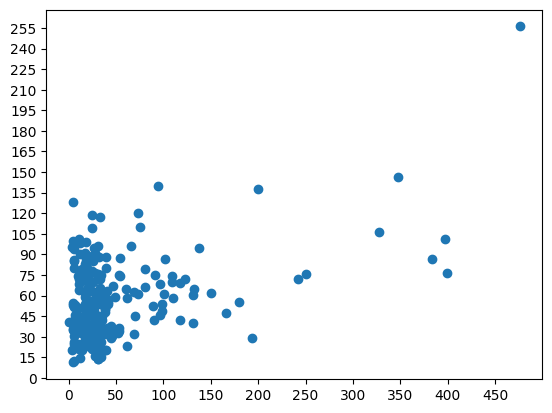

In [ ]:
plt.xticks(np.arange(0,500,50))
plt.yticks(np.arange(0,500,15))
plt.scatter(base['DIAS ESTOQUE'].values, base['VALOR FATURADO1'].values)


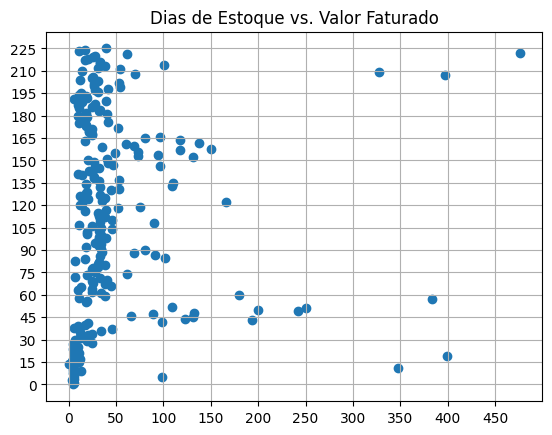

In [ ]:
plt.yticks(np.arange(0,500,15))
plt.xticks(np.arange(0,500,50))
plt.scatter(base['DIAS ESTOQUE'].values,base['VALOR FATURADO1'].index)
plt.title('Dias de Estoque vs. Valor Faturado')
plt.grid(True)

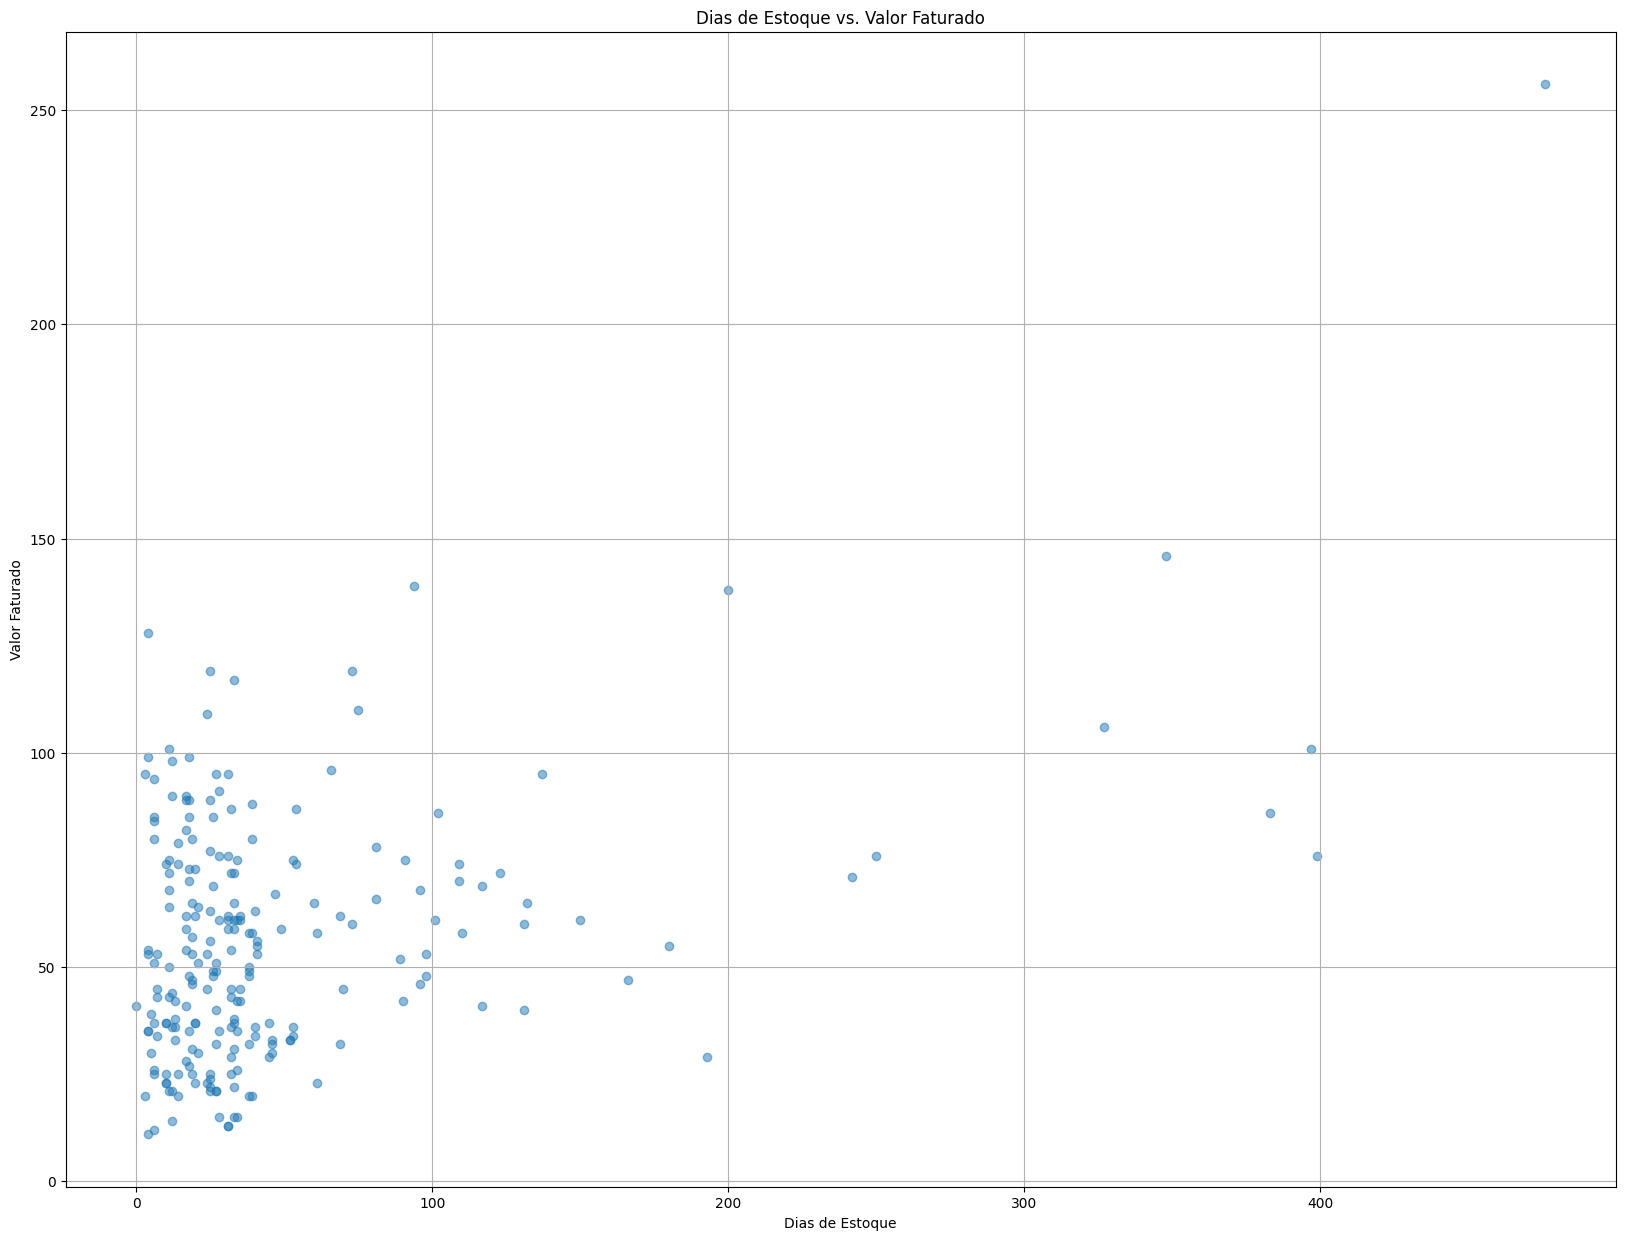

In [ ]:
plt.figure(figsize=(20, 15))  # Ajuste o tamanho do gráfico conforme necessário
plt.scatter(base['DIAS ESTOQUE'], base['VALOR FATURADO1'], alpha=0.5)  # alpha ajusta a transparência dos pontos
plt.title('Dias de Estoque vs. Valor Faturado')
plt.xlabel('Dias de Estoque')
plt.ylabel('Valor Faturado')
plt.grid(True)


plt.show()

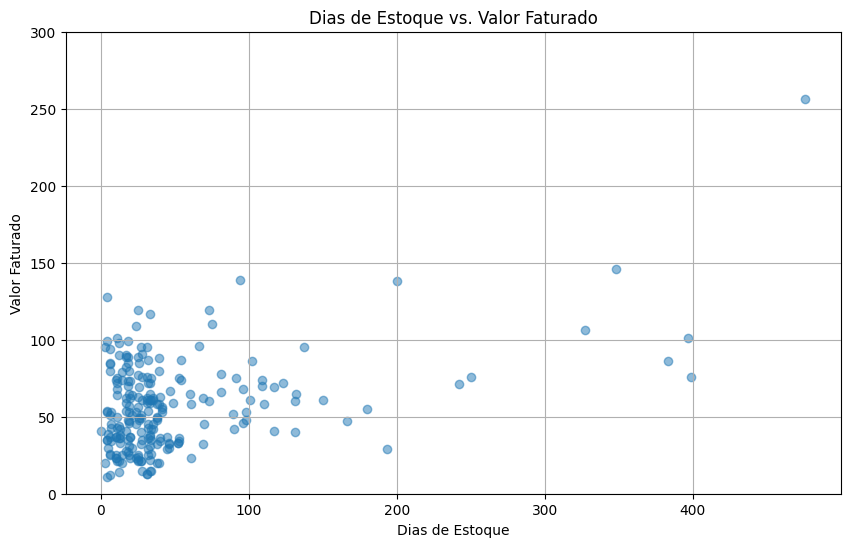

In [ ]:
plt.figure(figsize=(10, 6))  # Ajuste o tamanho do gráfico conforme necessário
plt.scatter(base['DIAS ESTOQUE'], base['VALOR FATURADO1'].values, alpha=0.5)  # alpha ajusta a transparência dos pontos
plt.title('Dias de Estoque vs. Valor Faturado')
plt.xlabel('Dias de Estoque')
plt.ylabel('Valor Faturado')
plt.grid(True)
plt.ylim(0, 300)

plt.show()

ValueError: ignored

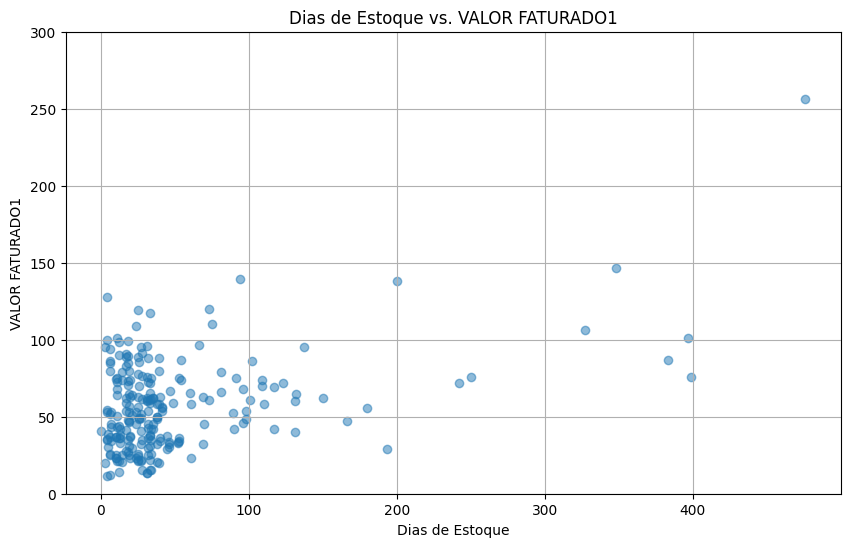

In [ ]:
# Suponha que você já tenha lido os dados em um DataFrame chamado 'base'

# Certifique-se de que as colunas 'DIAS ESTOQUE' e 'VALOR FATURADO1' sejam numéricas
base['DIAS ESTOQUE'] = pd.to_numeric(base['DIAS ESTOQUE'], errors='coerce')
base['VALOR FATURADO1'] = pd.to_numeric(base['VALOR FATURADO1'], errors='coerce')

# Crie um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(base['DIAS ESTOQUE'], base['VALOR FATURADO1'], alpha=0.5)
plt.title('Dias de Estoque vs. VALOR FATURADO1')
plt.xlabel('Dias de Estoque')
plt.ylabel('VALOR FATURADO1')
plt.grid(True)

# Ajuste o intervalo do eixo y
plt.ylim(0, 300)

# Criar um objeto de regressão linear
regression = LinearRegression()

# Separar os dados em X (dias de estoque) e y (VALOR FATURADO1)
X = base[['DIAS ESTOQUE']]
y = base['VALOR FATURADO1']

# Ajustar o modelo de regressão linear aos dados
regression.fit(X, y)

# Obter os coeficientes da regressão
coeficiente = regression.coef_
intercept = regression.intercept_

# Plotar a linha de regressão
plt.plot(X, regression.predict(X), color='red', linewidth=2, label=f'Regressão Linear (y={coeficiente[0]:.2f}x + {intercept:.2f})')

# Mostrar a legenda
plt.legend()

plt.show()


In [ ]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = imputer.fit_transform(y)

ValueError: ignored

In [ ]:
base.dropna(subset=['DIAS ESTOQUE', 'VALOR FATURADO'], inplace=True)


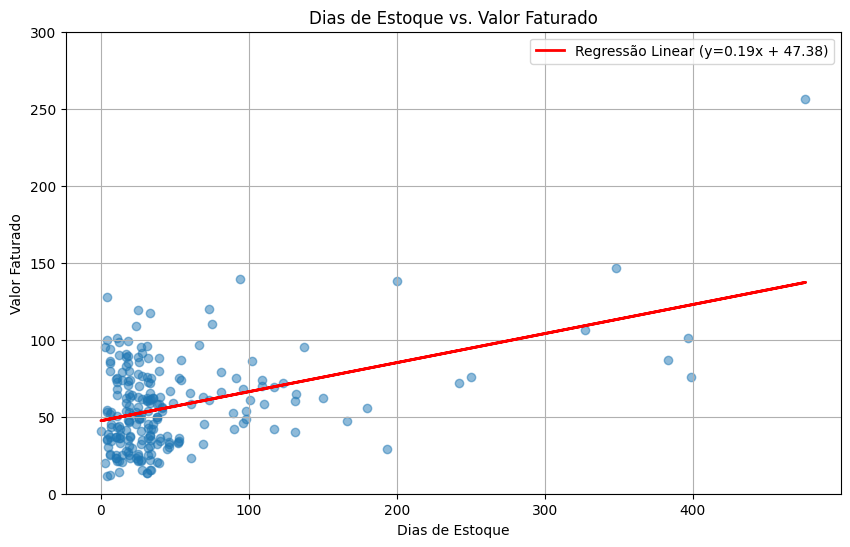

In [ ]:
base['DIAS ESTOQUE'] = pd.to_numeric(base['DIAS ESTOQUE'], errors='coerce')
base['VALOR FATURADO1'] = pd.to_numeric(base['VALOR FATURADO1'], errors='coerce')


plt.figure(figsize=(10, 6))
plt.scatter(base['DIAS ESTOQUE'], base['VALOR FATURADO1'], alpha=0.5)
plt.title('Dias de Estoque vs. Valor Faturado')
plt.xlabel('Dias de Estoque')
plt.ylabel('Valor Faturado')
plt.grid(True)


plt.ylim(0, 300)


regression = LinearRegression()

X = base[['DIAS ESTOQUE']]
y = base['VALOR FATURADO1']


regression.fit(X, y)


coeficiente = regression.coef_
intercept = regression.intercept_


plt.plot(X, regression.predict(X), color='red', linewidth=2, label=f'Regressão Linear (y={coeficiente[0]:.2f}x + {intercept:.2f})')

plt.legend()

plt.show()